<a href="https://colab.research.google.com/github/saritmaitra/ARIMA_Timeseries_Stochastic/blob/master/Natural_Gas_%26_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame 
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
!pip install plotly
import plotly.graph_objects as go

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
print("....Data Loading...."); print();
print('\033[4mHenry Hub Natural Gas Price\033[0m');
data = web.DataReader('NNJ24.NYM', data_source = 'yahoo', start = '2000-01-01')
data.rename(columns={'Close': 'price'}, inplace=True)
df = data.resample('M').last()
df = DataFrame(df.price.copy())
df

....Data Loading....

Henry Hub Natural Gas Price


,price
Date,
2011-11-30,7.074
2011-12-31,6.834
2012-01-31,6.602
2012-02-29,6.369
2012-03-31,6.330
...,...
2020-05-31,2.285
2020-06-30,2.243
2020-07-31,2.356


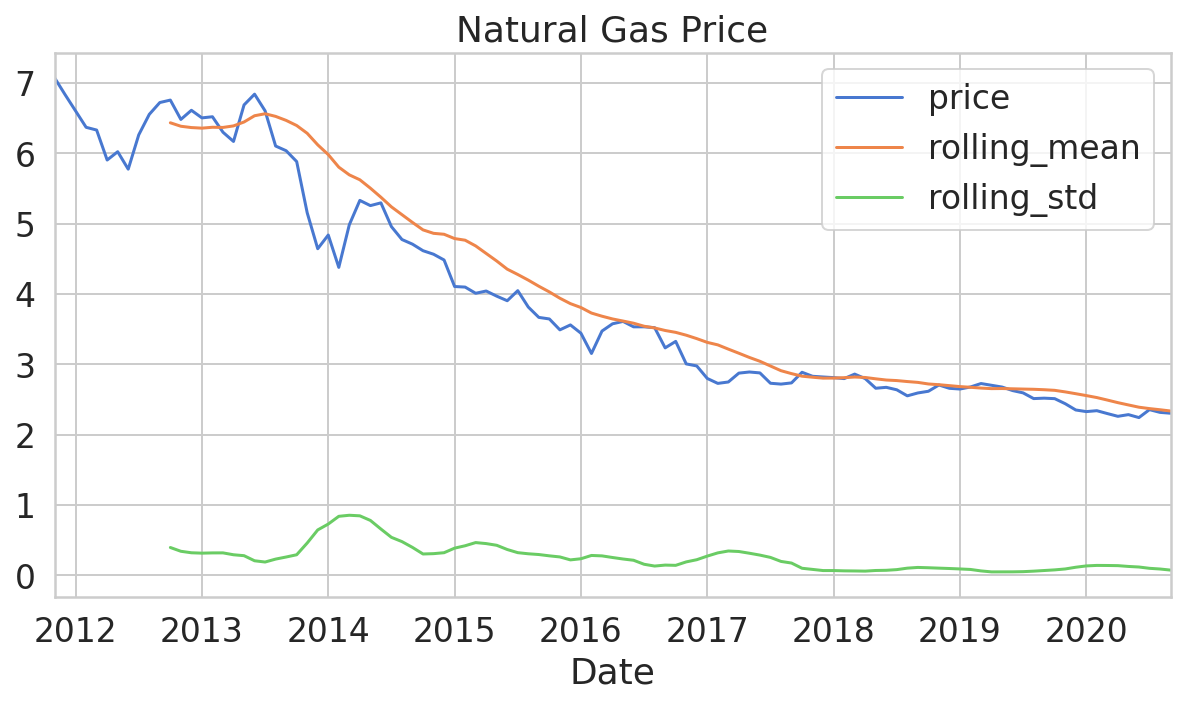

In [ ]:
window = 12
df['rolling_mean'] = df.price.rolling(window=window).mean()
df['rolling_std'] = df.price.rolling(window=window).std()
df.plot(title='Natural Gas Price', figsize = (10,5))
plt.show()

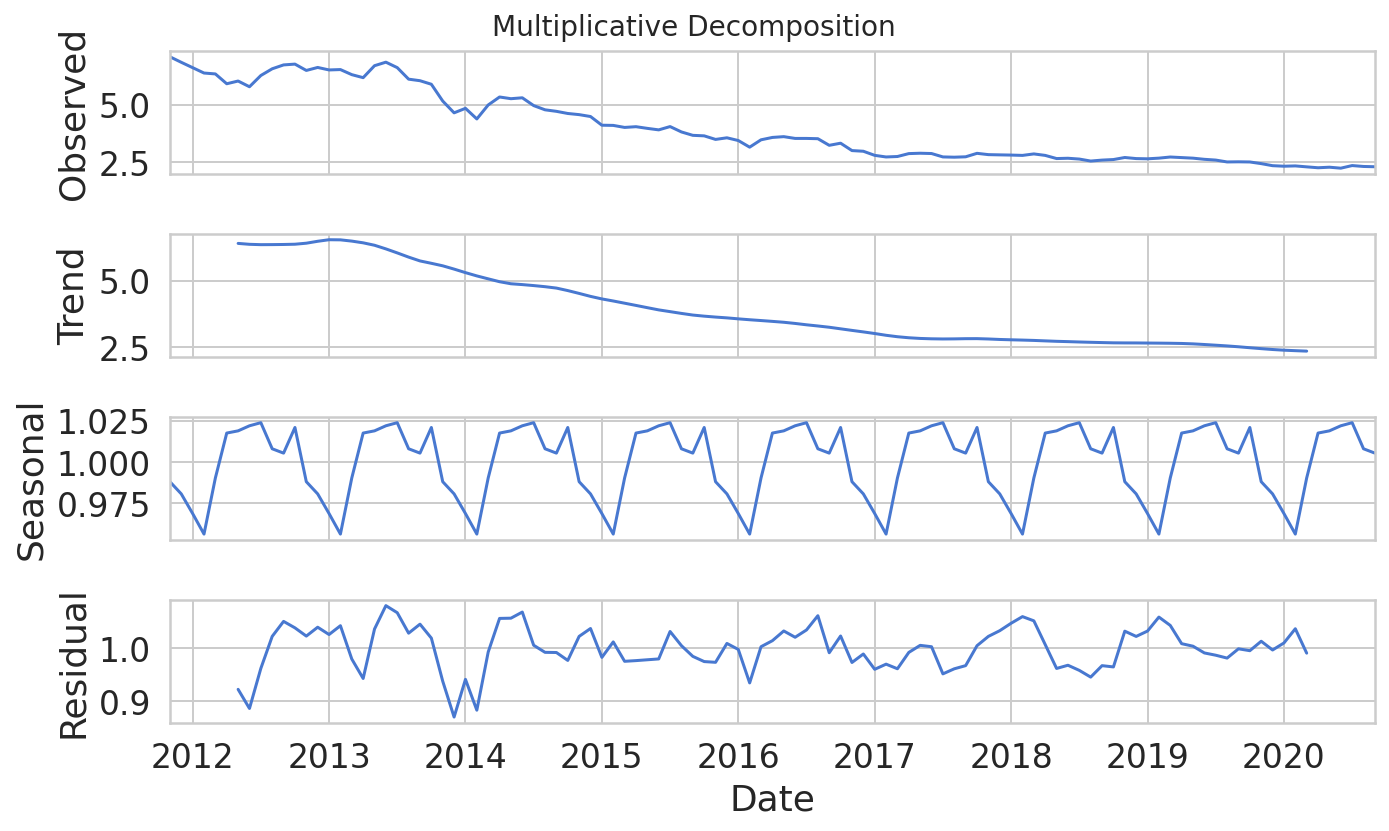

In [ ]:
decomp = seasonal_decompose(df.price, model='multiplicative')
rcParams['figure.figsize'] = 10, 6
decomp.plot().suptitle('Multiplicative Decomposition', fontsize=14);

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
print('Results Dickey-Fuller Test:')
test = adfuller(df.price, autolag = 'AIC')
output = pd.Series(test[0:4], index = ['Test Statistic', 'p-value','# of Lags Used', '# of Observations Used'])
for key, value in test[4].items():
    output[f'Critical Value ({key})'] = value

print(output)

Results Dickey-Fuller Test:
Test Statistic             -1.784942
p-value                     0.387963
# of Lags Used              0.000000
# of Observations Used    106.000000
Critical Value (1%)        -3.493602
Critical Value (5%)        -2.889217
Critical Value (10%)       -2.581533
dtype: float64


In [ ]:
def kpss_test(x, h0_type='c'):
  indices = ['Test Statistic', 'p-value', '# of Lags']
  kpss_test = kpss(x, regression=h0_type)
  results = pd.Series(kpss_test[0:3], index=indices)
  for key, value in kpss_test[3].items():
    results[f'Critical Value ({key})'] = value
  return results

kpss_test(df.price)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



Test Statistic            0.810465
p-value                   0.010000
# of Lags                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

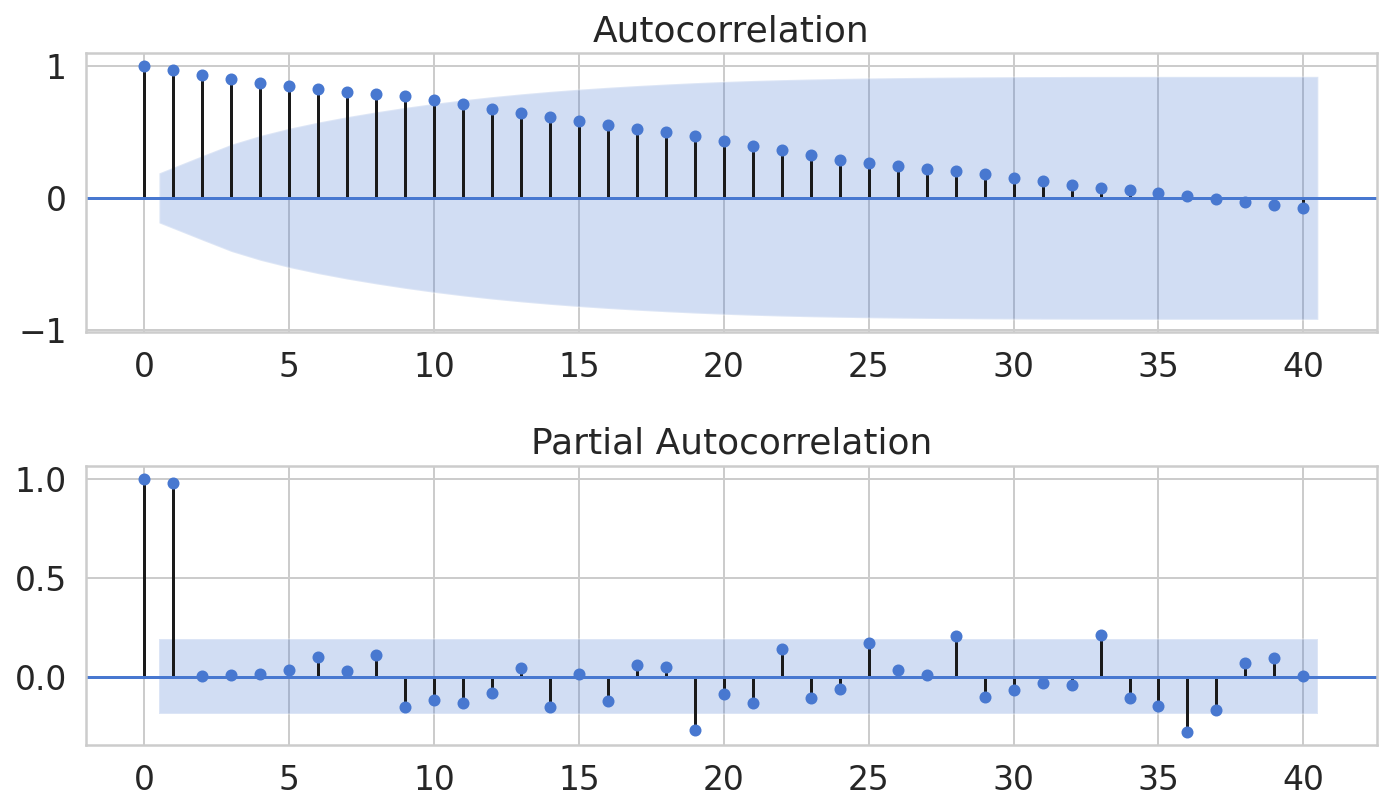

In [ ]:
lags = 40
sig_level = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(df.price, ax=ax[0], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
plot_pacf(df.price, ax=ax[1], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
plt.tight_layout()

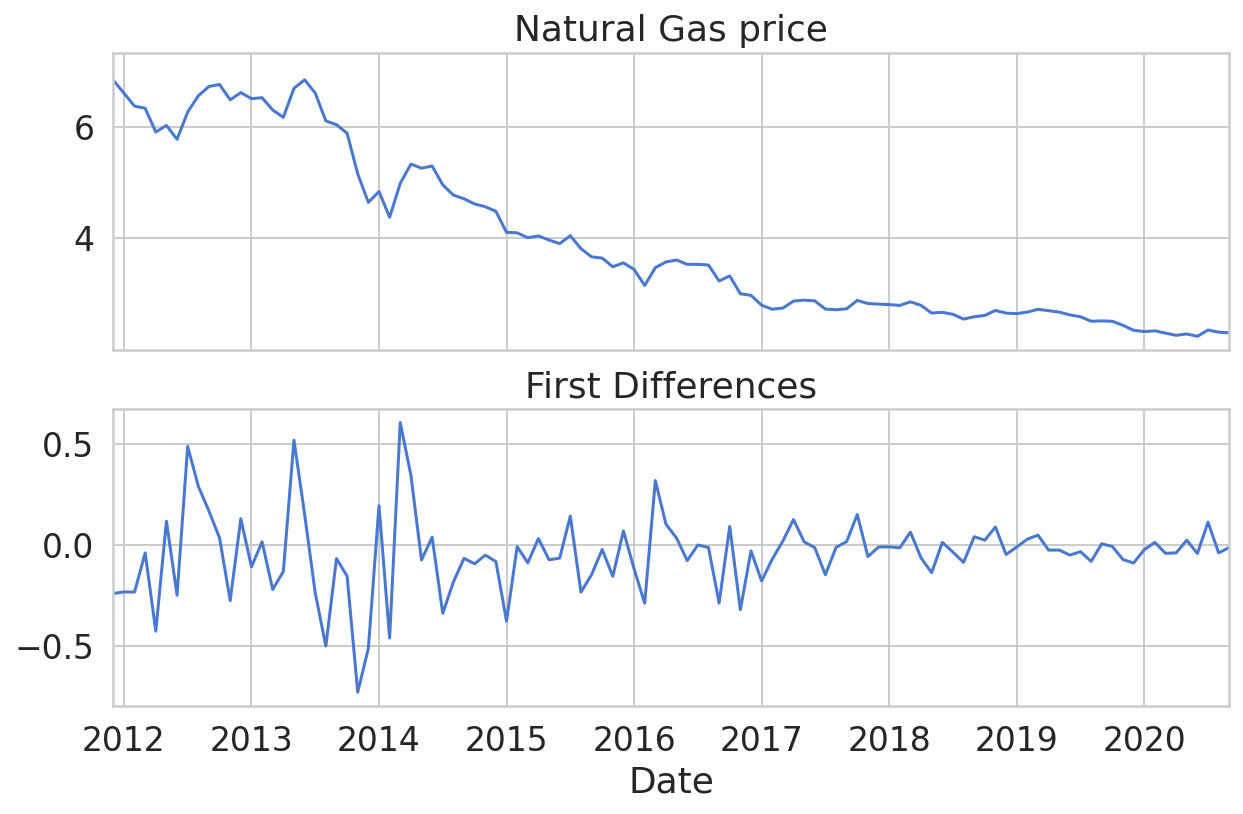

In [ ]:
price_diff = df.price.diff().dropna()
fig, ax = plt.subplots(2, sharex=True)
df.price.plot(title = "Natural Gas price", ax=ax[0])
price_diff.plot(ax=ax[1], title='First Differences')
plt.show()

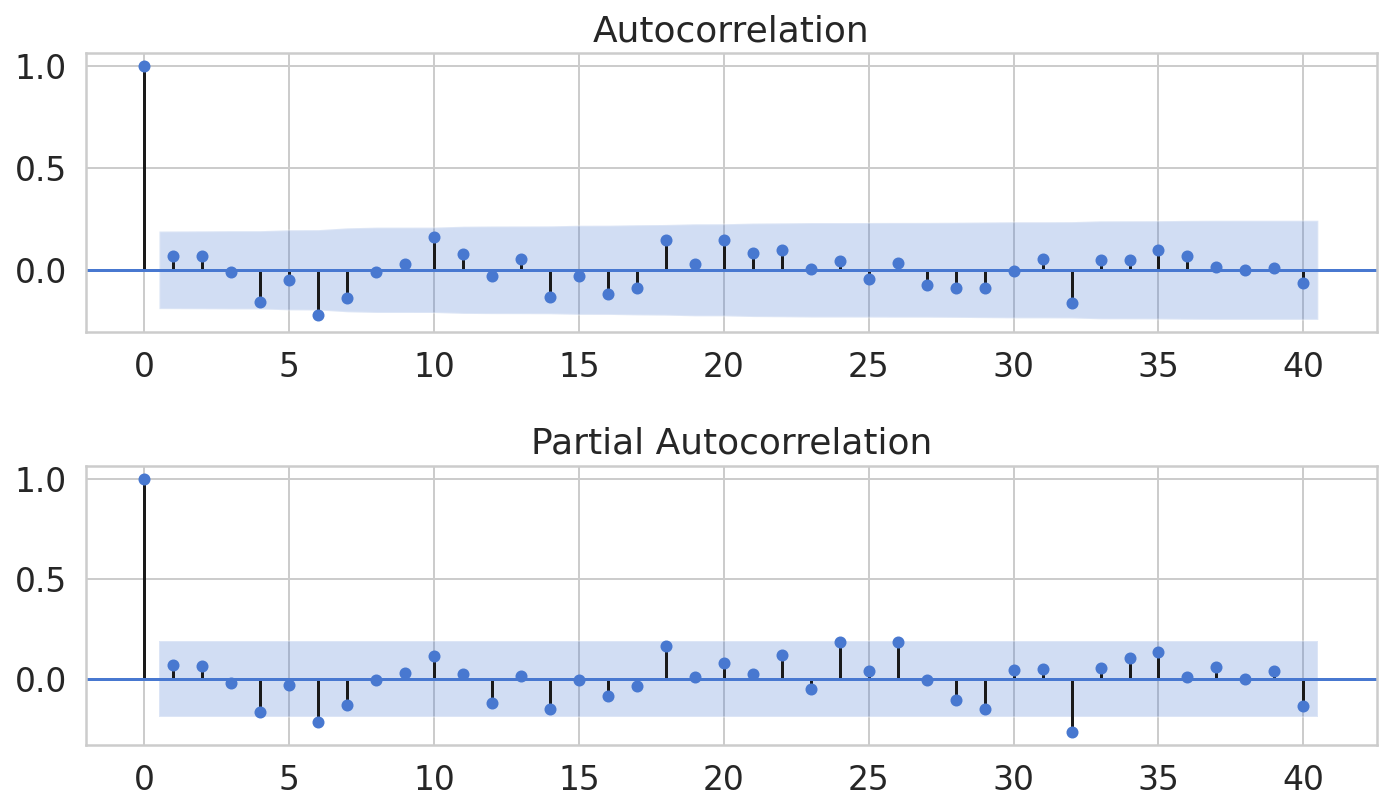

In [ ]:
fig, ax = plt.subplots(2, 1)
plot_acf(price_diff, ax=ax[0], lags=lags, alpha=sig_level)
plot_pacf(price_diff, ax=ax[1], lags=N_LAGS, alpha=sig_level)
plt.tight_layout()

In [ ]:
print(adf_test(price_diff).dropna()); print(); print(kpss_test(price_diff).dropna());

Test Statistic           -9.521530e+00
p-value                   3.055624e-16
# of Lags Used            0.000000e+00
# of Observations Used    1.050000e+02
Critical Value (1%)      -3.494220e+00
Critical Value (5%)      -2.889485e+00
Critical Value (10%)     -2.581676e+00
dtype: float64

Test Statistic            0.288121
p-value                   0.100000
# of Lags                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



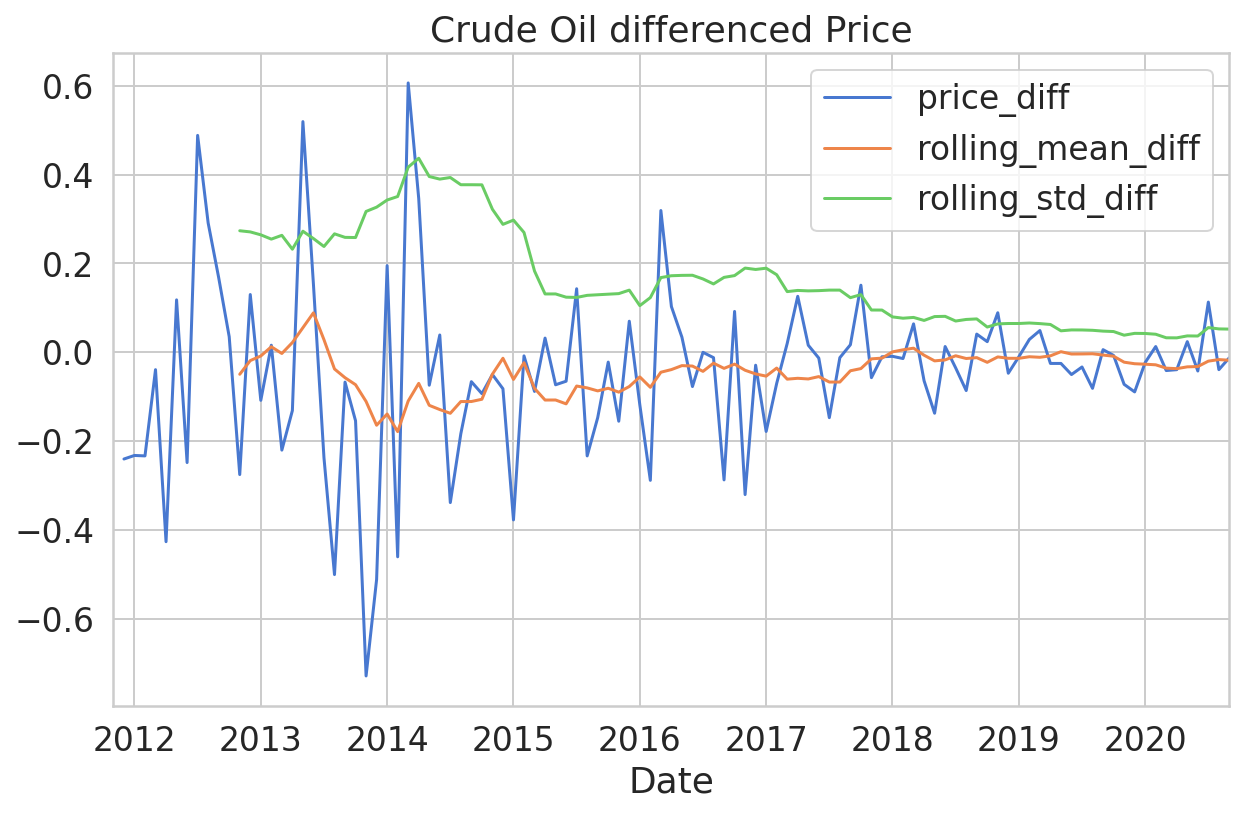

In [ ]:
rcParams['figure.figsize'] = 10, 6
columns = ['price_diff', 'rolling_mean_diff', 'rolling_std_diff']
df['price_diff'] = df['price'].diff()
df['rolling_mean_diff'] = df['price'].diff().rolling(window=window).mean()
df['rolling_std_diff'] = df['price'].diff().rolling(window=window).std()
df[columns].plot(title='Crude Oil differenced Price')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



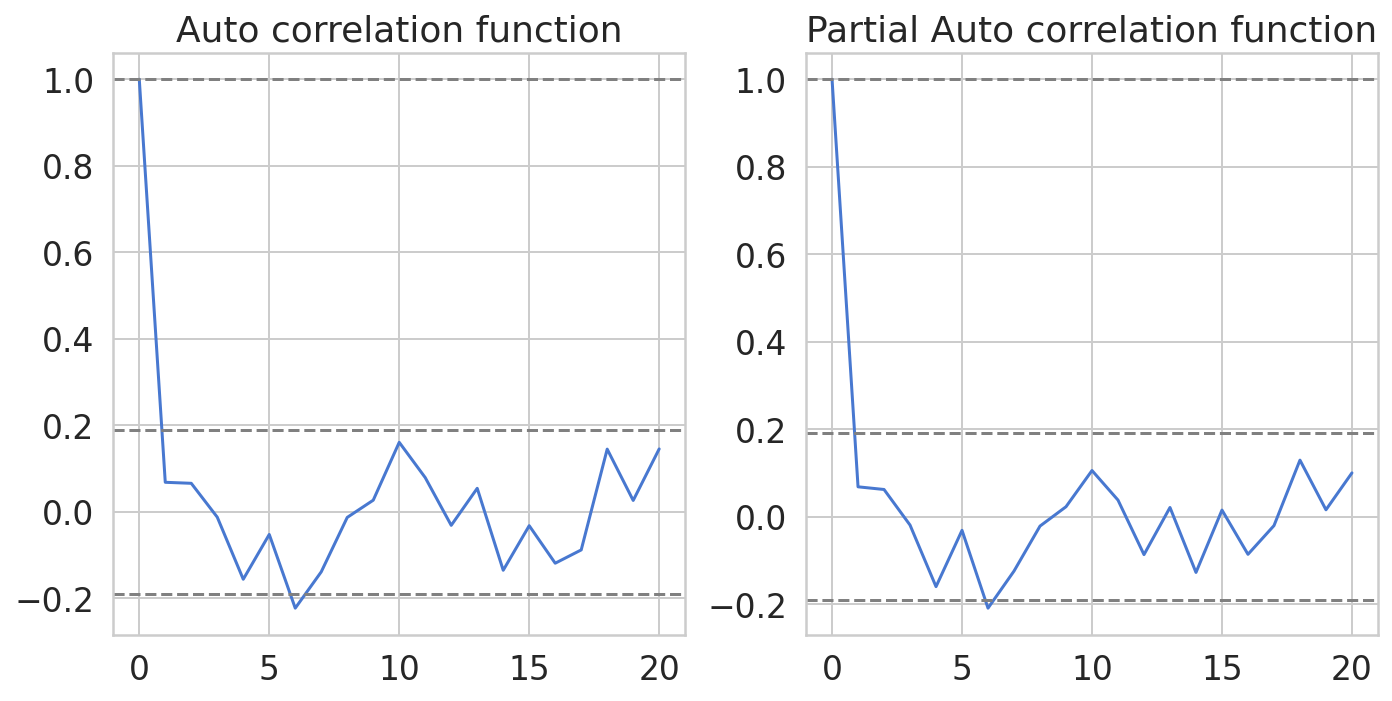

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
rcParams['figure.figsize'] = 10, 5

diff = df.price.diff().dropna()

lag_acf = acf(diff, nlags=20)
lag_pacf = pacf(diff, nlags=20, method = 'ols')

# plot acf
plt.subplot(121); plt.plot(lag_acf);
plt.axhline(y=1, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)), linestyle='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(diff)), linestyle='--', color = 'gray')
plt.title('Auto correlation function')

# plot pacf
plt.subplot(122); plt.plot(lag_pacf);
plt.axhline(y=1, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)), linestyle='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(diff)), linestyle='--', color = 'gray')
plt.title('Partial Auto correlation function'); plt.tight_layout();

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(df.price, order=(3, 1, 2)).fit(disp=0)
arima.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                  106
Model:                 ARIMA(3, 1, 2)   Log Likelihood                  24.870
Method:                       css-mle   S.D. of innovations              0.190
Date:                Fri, 18 Sep 2020   AIC                            -35.739
Time:                        16:20:49   BIC                            -17.095
Sample:                    12-31-2011   HQIC                           -28.183
                         - 09-30-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0456      0.022     -2.114      0.037      -0.088      -0.003
ar.L1.D.price    -1.0547      0.528     -1.998      0.048      -2.089      -0.020
ar.L2.D.price    -0.0025      0.499     -0.005      0.996      -0.981       0.976
ar.L3.D.price     0.1026      0.101      1.011      0.314      -0.096       0.302
ma.L1.D.price     1.1457      0.527      2.173      0.032       0.112       2.179
ma.L2.D.price     0.1457      0.525      0.277      0.782      -0.884       1.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0701           +0.0000j            1.0701            0.5000
AR.2           -2.5196           +0.0000j            2.5196            0.5000
AR.3            3.6143           +0.0000j            3.6143            0.0000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2           -6.8632           +0.0000j            6.8632            0.5000
-----------------------------------------------------------------------------
"""

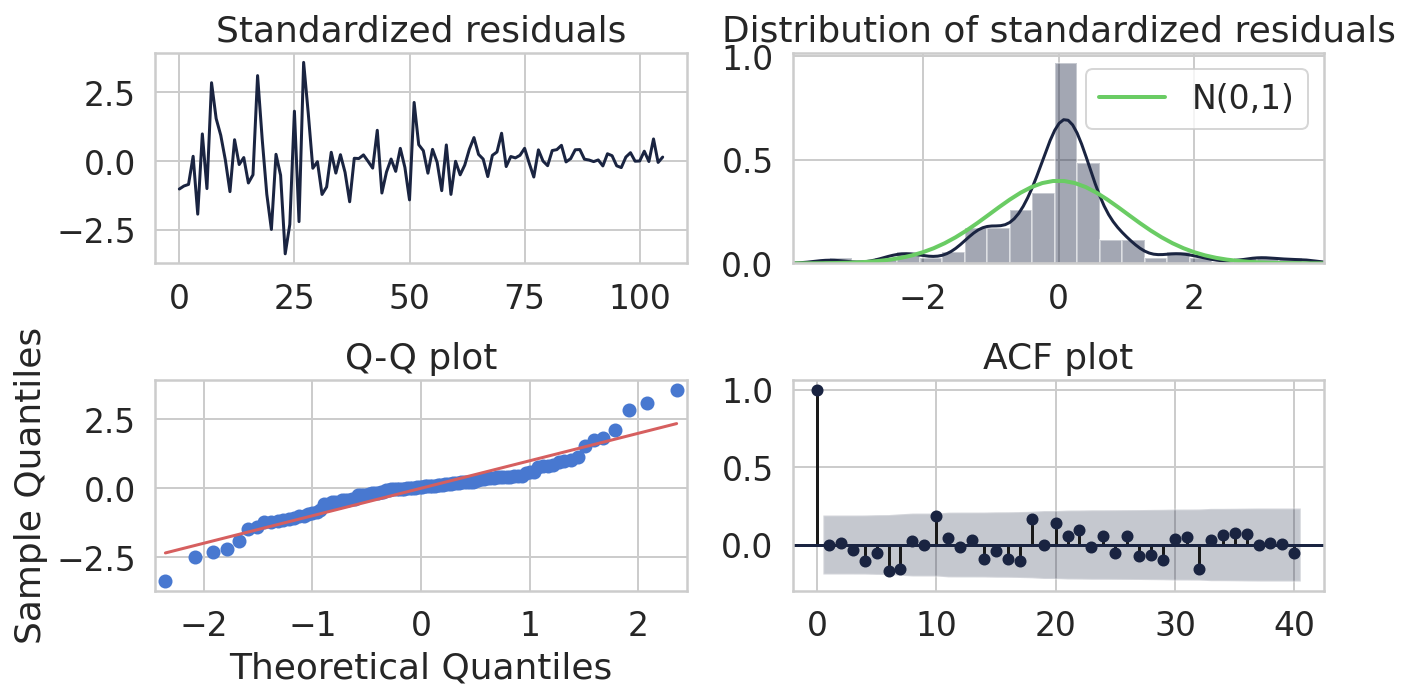

In [ ]:
import scipy.stats as scs
import statsmodels.api as sm

def arima_diagnostics(resids, n_lags=40):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  r = resids
  resids = (r - np.nanmean(r)) / np.nanstd(r)
  resids_nonmissing = resids[~(np.isnan(resids))]
  
  sns.lineplot(x=np.arange(len(resids)), y=resids, ax=ax1)
  ax1.set_title('Standardized residuals')
 
  x_lim = (-1.96 * 2, 1.96 * 2)
  r_range = np.linspace(x_lim[0], x_lim[1])
  norm_pdf = scs.norm.pdf(r_range)
  sns.distplot(resids_nonmissing, hist=True, kde=True, norm_hist=True, ax=ax2)
  ax2.plot(r_range, norm_pdf, 'g', lw=2, label='N(0,1)')
  ax2.set_title('Distribution of standardized residuals')
  ax2.set_xlim(x_lim)
  ax2.legend()
  
  # Q-Q plot
  qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3)
  ax3.set_title('Q-Q plot')
  
  # ACF plot
  plot_acf(resids, ax=ax4, lags=n_lags, alpha=0.05)
  ax4.set_title('ACF plot')
  return fig

arima_diagnostics(arima.resid, 40)
plt.tight_layout()

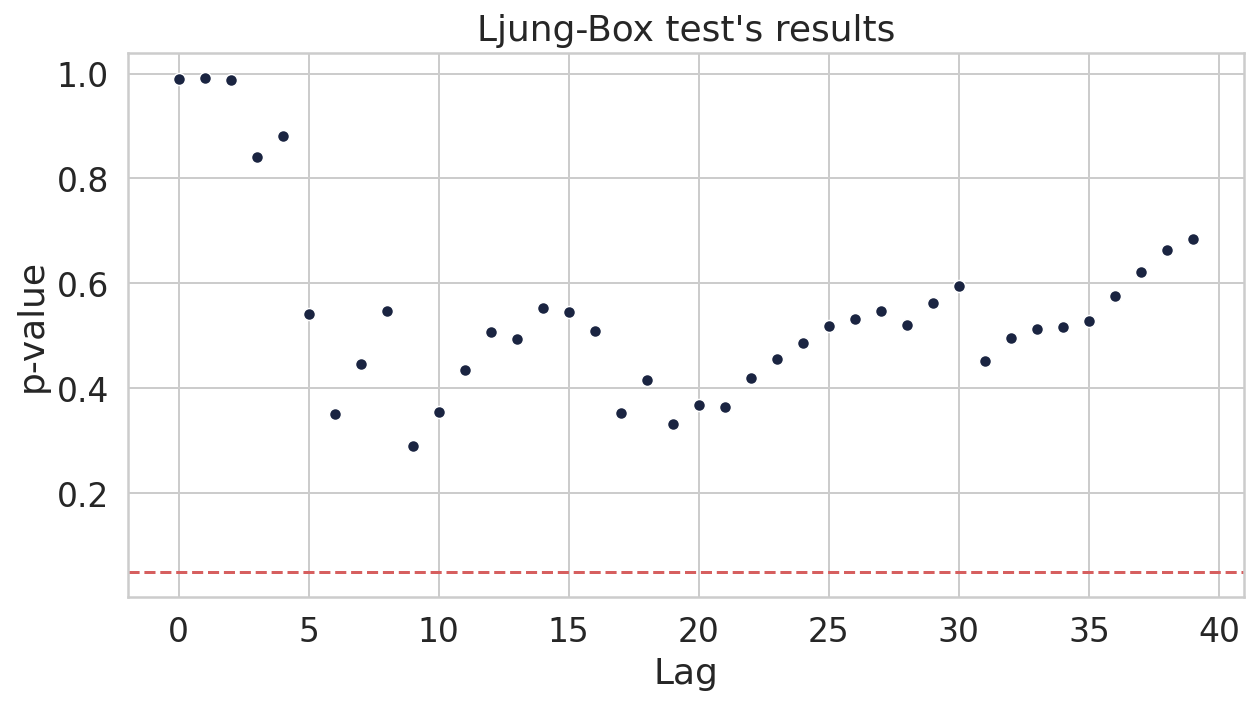

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_results = acorr_ljungbox(arima.resid)
fig, ax = plt.subplots(1, figsize=[10, 5])
sns.scatterplot(x=range(len(ljung_box_results[1])), y=ljung_box_results[1], ax=ax)
ax.axhline(0.05, ls='--', c='r')
ax.set(title="Ljung-Box test's results", xlabel='Lag', ylabel='p-value')
plt.show()

In [ ]:
from pandas import DataFrame, concat

forecast = int(12)
arima_pred, std, ci = (arima.forecast(forecast))

arima_pred = DataFrame(arima_pred)
d = DataFrame(df.price.tail(len(arima_pred))); d.reset_index(inplace = True)
d = d.append(DataFrame({'Date': pd.date_range(start = d.Date.iloc[-1], 
                                             periods = (len(d)+1), freq = 'm', closed = 'right')}))
d = d.tail(forecast); d.set_index('Date', inplace = True)
arima_pred.index = d.index
arima_pred.rename(columns = {0: 'arima_fcast'}, inplace=True)

# 95% prediction interval
ci = DataFrame(ci)
ci.rename(columns = {0: 'lower95', 1:'upper95'}, inplace=True)
ci.index = arima_pred.index

ARIMA = concat([arima_pred, ci], axis=1)
ARIMA

,arima_fcast,lower95,upper95
Date,,,
2020-10-31,2.271506,1.899108,2.643904
2020-11-30,2.217806,1.666679,2.768933
2020-12-31,2.184087,1.488817,2.879358
2021-01-31,2.127138,1.302491,2.951786
2021-02-28,2.092567,1.164284,3.020850
2021-03-31,2.036503,1.006575,3.066431
2021-04-30,2.000668,0.885661,3.115674
2021-05-31,1.945847,0.745186,3.146508
2021-06-30,1.908794,0.634034,3.183554


In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pm

model = pm.auto_arima(df.price, error_action='ignore', suppress_warnings=True,
                      seasonal=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  23.828
Date:                Fri, 18 Sep 2020   AIC                            -43.656
Time:                        16:16:30   BIC                            -38.329
Sample:                             0   HQIC                           -41.497
                                - 107                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0450      0.019     -2.397      0.017      -0.082      -0.008
sigma2         0.0373      0.003     11.087      0.000       0.031       0.044
===================================================================================
Ljung-Box (Q):                       41.57   Jarque-Bera (JB):                30.75
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = pm.auto_arima(df.price, error_action='ignore', suppress_warnings=True,
                      seasonal=False, stepwise=False, approximation=False, n_jobs=-1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  23.828
Date:                Fri, 18 Sep 2020   AIC                            -43.656
Time:                        16:16:39   BIC                            -38.329
Sample:                             0   HQIC                           -41.497
                                - 107                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0450      0.019     -2.397      0.017      -0.082      -0.008
sigma2         0.0373      0.003     11.087      0.000       0.031       0.044
===================================================================================
Ljung-Box (Q):                       41.57   Jarque-Bera (JB):                30.75
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_arima_pred = model.predict(n_periods=forecast, return_conf_int=True,alpha=0.05)
auto_arima_pred = [DataFrame(auto_arima_pred[0],columns=['prediction']),DataFrame(auto_arima_pred[1], 
                                                                                  columns=['ci_lower', 'ci_upper'])]
auto_arima_pred = concat(auto_arima_pred,axis=1).set_index(ARIMA.index)
auto_arima_pred

,prediction,ci_lower,ci_upper
Date,,,
2020-10-31,2.260009,1.881231,2.638788
2020-11-30,2.215019,1.679345,2.750693
2020-12-31,2.170028,1.513965,2.826092
2021-01-31,2.125038,1.367481,2.882595
2021-02-28,2.080047,1.233073,2.927022
2021-03-31,2.035057,1.107243,2.962871
2021-04-30,1.990066,0.987912,2.992220
2021-05-31,1.945076,0.873728,3.016423
2021-06-30,1.900085,0.763750,3.036420


<Figure size 720x360 with 0 Axes>

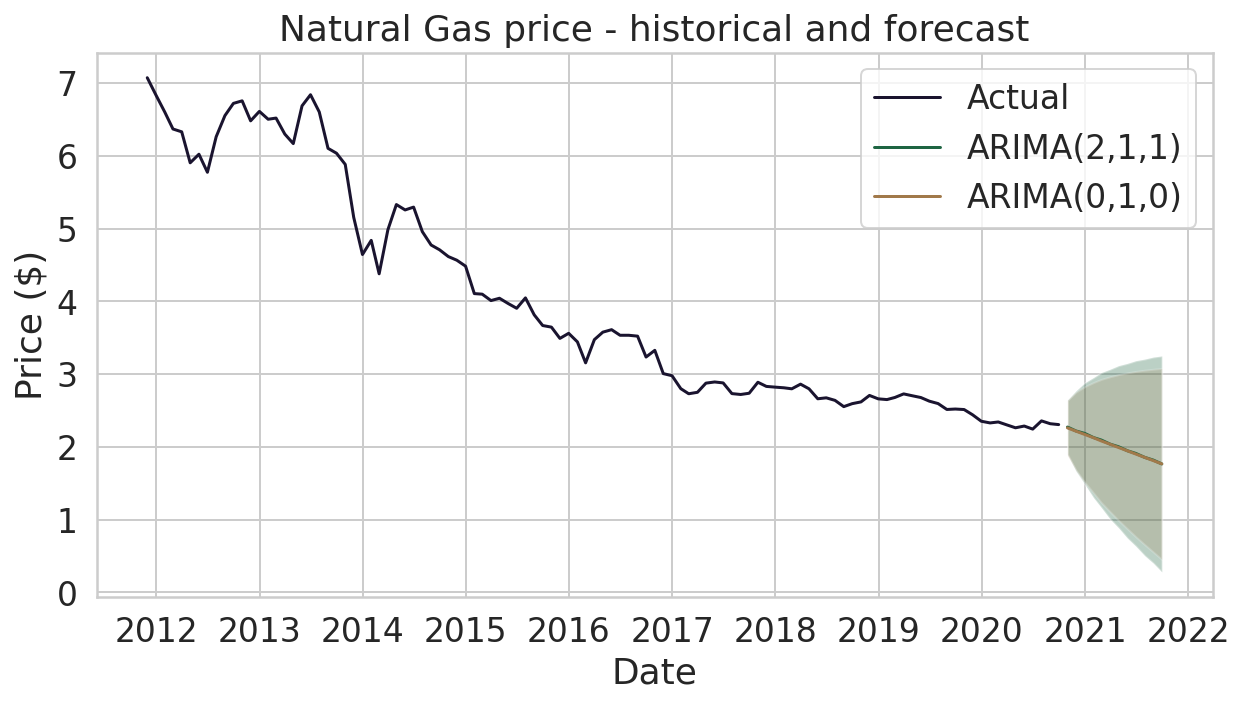

In [ ]:
plt.set_cmap('cubehelix'); sns.set_palette('cubehelix')
COLORS = [plt.cm.cubehelix(x) for x in [0.1, 0.3, 0.5, 0.7]]; fig, ax = plt.subplots(1)
ax = sns.lineplot(data=df.price, color=COLORS[0], label='Actual')
ax.plot(ARIMA.arima_fcast, c=COLORS[1], label='ARIMA(2,1,1)')
ax.fill_between(ARIMA.index, ARIMA.lower95, ARIMA.upper95, alpha=0.3, facecolor=COLORS[1])
ax.plot(auto_arima_pred.prediction, c=COLORS[2], label='ARIMA(0,1,0)')
ax.fill_between(auto_arima_pred.index, auto_arima_pred.ci_lower, auto_arima_pred.ci_upper,
                alpha=0.2, facecolor=COLORS[2])
ax.set(title="Natural Gas price - historical and forecast", xlabel='Date', ylabel='Price ($)') 
ax.legend(loc='best')